In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
X = df.drop('Class',axis=1)
y = df['Class']

print(X.shape,y.shape)

(284807, 30) (284807,)


# Exploratory Data Analysis

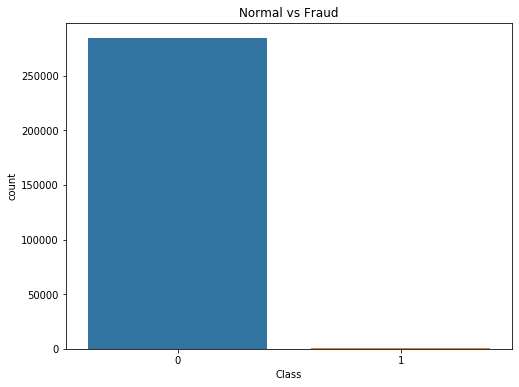

In [5]:
plt.figure(figsize=(8,6))
plt.title('Normal vs Fraud')
sns.countplot(df['Class'])

In [6]:
# get fraud and normal data

fraud = df[df['Class']==1]
normal = df[df['Class']==0]

In [7]:
fraud.shape,normal.shape

((492, 31), (284315, 31))

# Over-Sampling

Over-Sampling will add more the rows of categories which has the less categories label 
 and make same to max categories label
 
 for eg- here we have fraud class less and normal class more 
         so we will add more some fraud by repeating same fraud data rows and make equal to Normal class rows
         then it will be equal 
         
Warning :- Over _sampling when you have less data set

In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
os = RandomOverSampler()

X_res,y_res = os.fit_sample(X,y)

In [10]:
X_res.shape,y_res.shape

((568630, 30), (568630,))

In [11]:
from collections import Counter

print(f'Original dataset shape {Counter(y)}')
print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


# Linear Regression

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

lg_predict = lg.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y_test,lg_predict))
print()
print(confusion_matrix(y_test,lg_predict))
print()
print(accuracy_score(y_test,lg_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.67      0.62      0.64       149

    accuracy                           1.00     93987
   macro avg       0.83      0.81      0.82     93987
weighted avg       1.00      1.00      1.00     93987


[[93792    46]
 [   57    92]]

0.9989041037590305
